# Phase Estimation

## Overview

- Type: Estimation task, foundational subroutine
- Estimated difficulty: Intermediate
- Useful preliminaries: Phase kickback, Hadamard test, Quantum Fourier Transform
- Applications: Public key crytography, eigenvalue estimation, solving linear systems, amplitude estimation, quantum sciences and engineering. 

In quantum computing, *phase estimation* refers to the task of estimating the eigenvalue of a unitary operator given an approximate eigenvector. Computational routines which accomplish this task are known as *phase estimation procedures*, or *algorithms*. Commonly, the term *phase estimation* refers interchangeably to either the problem or the procedure. 

## Problem statement

For a unitary operation $U$, and associated eigenvector $\vert u \rangle$, there is a unique $\theta \in [0,1)$ such that

$$
U \vert u \rangle = e^{2\pi i \theta} \vert u \rangle.
$$

Given black-box access to a unitary $U$, controlled versions thereof, and an eigenvector (a.k.a. eigenstate) $\vert u \rangle$ prepared on a quantum register to fidelity $F \in (0, 1]$, determine $\theta$ to within precision $\epsilon$ with probability $1-\delta$. We refer to $\theta$ as the *phase*. 

### Comments

When the initial state is not an approximate eigenvector $\vert u\rangle$ but rather a generic superposition $\sum_i c_i \vert u_i\rangle$ of eigenstates, many phase estimation algorithms will still work, in the sense that they will return (with high probability) an estimate of the phase $\theta_i$ of $\vert u_i\rangle$ with probability $\vert c_i\vert^2$. Thus, $F$ does not necessarily need to be close to one. In this article, we will call such algorithms "coherent". Those which only work on an approximate eigenstate (i.e., $F$ close to $1$) will be termed "incoherent." Incoherent phase estimation algorithms, though less powerful, typically have lower circuit depths, and therefore may work better on noisy hardware. 

The error in the phase $\theta \in [0,1)$ is defined circularly, as expected for phase shifts in general periodic phenomena. For example, if $\theta = 0.1$, an algorithm which estimates $\theta$ as $0.9$ is actually accurate to $0.2$, not $0.8$. The circular distance $d(\theta, \phi)$ between phases $\theta, \phi \in [0,1)$ is defined as their shortest distance on the circle of circumference one, and can be computed as
$$
d(\theta, \phi) = \min(\vert\theta- \phi\vert,1- \vert\theta - \phi\vert).
$$
This distance $d$ is always upper bounded by $1/2$. Thus, if $\tilde{\theta}$ is our estimate of $\theta$, achieving precision $\epsilon$ means $d(\tilde{\theta}, \theta) \leq \epsilon$. 

## Algorithms for phase estimation

We begin with a brief discussion of classical algorithms for phase estimation, then list the several *quantum* phase estimation algorithms which will be the focus of the rest of this article. Caution: the term "algorithm" here is slightly misplaced, since the phase estimation problem contains black boxes (such as $U$) that are not fully specified. (see Nielsen and Chuang)

### A brief summary of classical algorithms

Assuming black box access to the entries of $U$ and $\vert u\rangle$ as floating point numbers, standard matrix multiplication $U \vert u\rangle$ may be used to compute the eigenvalue. In fact, only the first entry of the output needs to be computed. However, for an input vector of size $2^n$, we still require an exponential number of oracle calls and arithmetic operations. Thus, in the generic case, this procedure will take exponential time. Moreover, the entries will need to be known exponentially precisely in order to obtain an estimate of $\theta$ to fixed precision.

More generally, all eigenvalues of $U$ can be found through exact diagonalization. The [QR Algorithm](https://en.wikipedia.org/wiki/QR_algorithm) can be used to find the eigenvalues in time scaling polynomially with the dimension of the matrix. Unfortunately, the dimension of the unitary often scales exponentially with the problem size in interesting computational tasks, such as optimization problems or Hamiltonian simulation.

### Quantum algorithms

Quantum Phase Estimation Algorithms (QPEAs) employ phase kickback and quantum interference to measure the desired phase $\theta$ on an auxiliary quantum register. They can be viewed as an approximate projective measurement along the eigenspaces of $U$. As such, it will typically yield result $\theta_i$ with probability given by the Born rule. Moreover, output state on the main register will be an approximate projection onto the corresponding eigenspace.

QPEAs can be described to varying degrees as *serial* or *iterative*, depending on whether the basic measurements are done in parallel (serial) or in sequence (iterative). Standard phase estimation is the best known of the serial QPEAs and requires minimal to no classical processing. Iterative QPEAs have comparatively fewer auxiliary qubits, perform multiple rounds of measurement, and require nontrivial classical computation. The serial-iterative designation is a continuous scale, and hybrid schemes involving intermediate levels of serial or iterative operations also exist. However, the algorithms we consider here will be firmly in one camp or another. 

Iterative QPEAs can be further classified as adaptive and nonadaptive. Adaptive means that classical processing must be done alongside, or in between, quantum measurements, and subsequent operations will depend on earlier measurement results. The promise of adaptive schemes is to choose subsequent measurement circuits that are more effective at learning new information about the phase. However, faciliating classical-quantum hybrid computations in real time can be demanding on memory-restricted hardware.  

The remainder of this article will focus on the following incomplete list of QPEAs.  

- Standard Quantum Phase Estimation 
- Iterative Quantum Phase Estimation
- Hadamard Test Phase Estimation
- Kitaev Phase Estimation
- Fast Phase Estimation
- Rejection Filtering Phase Estimation

**Place Venn diagram here showing the various categories (adaptive, nonadaptive, iterative, serial, hybrid )**

### Technical comments

Assigning a true computational cost to phase estimation is challenging because the black box $U$ is not specified. It is reasonable to treat the number of calls to $U$ (the "query complexity") as the metric of cost, as this can often be the most expensive part of the computation. In this scheme, a controlled-$U^j$ for integer $j$ would have the same cost as $j$ calls to controlled-$U$. This turns out to be reasonable, because although powers of $U$ can be computed quickly for certain $U$ (e.g., through repeated squaring for $U$ being a reversible classical operation), in general you can't do better than repeated calls to $U$. We note that Shor's algorithm is a crucial example where powers of $U$ *can* be computed quickly, leading to the famous exponential speedup for factoring.

All but the simplest QPEAs achieve a nearly $O(1/\epsilon)$ scaling in the number of controlled-$U$ queries, which is a provably optimal scaling known as the *Heisenberg limit*. They also exhibit a logarithmic dependence on $\delta$. 

Crucially, the quantum "black box" $U$ is represented by $n$ qubits rather than an exponentially large matrix. While not all $n$ qubit unitaries can be simulated efficiently, important subclasses of unitaries can be written as an efficient quantum circuit of gates acting on, at most, a fixed number of qubits.

Phase estimation sheds no light on how to prepare the initial state of the main register. The difficulty of doing so is problem dependent. For example, state preparation is trivial in Shor's algorithm, while approximating eigenstates of a many-body system in physics may require problem-specific, physics-motivated approaches. 

## Standard Quantum Phase Estimation

As the name suggests, standard QPE is possibly the most well known algorithm for phase estimation, often simply called "phase estimation." Also known as "QFT-based" phase estimation due to the use of the inverse Quantum Fourier Transform. 

### Characteristics

Iterative: No \
Adaptive: N/A \
Coherent: Yes \
Qubit overhead: $O(\log(1/\epsilon))$. \
Runtime: $O(\epsilon^{-1}\log 1/\delta)$ calls to the controlled-$U$. \
Maximum depth: $O(\epsilon^{-1})$

### Circuit diagram

**Surely we can pull from an existing source**

### Description of procedure

The main register is prepared in an eigenstate $\vert u\rangle$, and a register of auxiliary qubits is initialized to $\vert 0\rangle$. A column of Hadamards puts the auxiliary register in uniform superposition over the computational basis. For each of these bitstrings $\vert b\rangle$ in the superposition, the controlled-$U$ gates act together as a controlled $U^b$, putting the total state as 

$$
\sum_{b} \vert b\rangle U^b \vert u\rangle = \left(\sum_{b} e^{2\pi i b \theta} \vert b\rangle\right)\otimes \vert u\rangle.
$$

We can clearly see the effect of phase kickback. If $\theta$ were exactly a binary fraction $0.\theta_1\theta_2\dots\theta_n$, we would see that the above state is the Quantum Fourier Transform of $\theta 2^n$. Thus, taking the inverse Quantum Fourier Transform would yield exactly $\vert\theta_1\dots\theta_n\rangle$ on the auxiliary register. When $\theta$ is more general, a deeper analysis shows that performing the inverse Quantum Fourier Transform will, with high probability, return the closest binary approximation to $\theta$.

The argument above extends to superpositions of eigenstates $\sum_i c_i \vert u_i\rangle$ by linearity, with only minor complications. In this case the phase $\theta_i$ is estimated with probability approximately according to the Born rule. 

### Pseudocode (Nielsen and Chuang pg. 235)

**Should we have along with Qiskit code?**

### Details and commentary

Standard QPE is a serial algorithm, since only one set of measurements at the end of the circuit is necessary to obtain, with high probability, an estimate of one of the eigenphases $\theta$ of $U$. This is in contrast to iterative algorithms, which comprise the remainder of the algorithms considered. To achieve $n$ bits of precision, roughly $n$ auxiliary qubits should be used. More precisely, choosing

$$
t = n + \left\lceil\log\left(2 + \frac{1}{2\eta}\right)\right\rceil
$$

auxiliary qubits ensure $n$ bits of accuracy are achieved with probability $1-\eta$ (see Ch 5 Nielsen and Chuang for details). In practice, it is usually preferable to boost the overall success probability $1-\delta$ via a majority vote of several trials with constant success probability $(1-\eta)$, rather than reducing the "direct" failure probability $\eta$.

### Qiskit Implementation

In [253]:
import numpy as np

from qiskit import QuantumRegister, ClassicalRegister, QuantumCircuit
from qiskit.circuit.library import QFT


def standard_QPE_circuit(U, Uprep = None, precision = 2**-4):
    """
    Args:
        U (Gate): Unitary gate in phase estimation problem
        Uprep (Instruction): State preparation starting from all |0> state (If None, no state prep added). 
        precision (float): Desired precision of final phase estimate
    Returns:
        QuantumCircuit that implements standard QPE
    """
    
    bits_precision = int(np.ceil(np.log2(1/precision)))# determine necessary number of auxiliary qubits
    cU = U.control(1) # Define controlled U
    
    # Step 1: Initialize circuit.
    aux = QuantumRegister(bits_precision, "aux")  # register where result is stored
    main = QuantumRegister(U.num_qubits, "q")    # register for storing |u>
    classical = ClassicalRegister(bits_precision, "c")  # register for readout of result
    circuit = QuantumCircuit(aux, main, classical)
    
    # Step 2: Initialize state of main register (if needed)
    if Uprep != None: 
        circuit.compose(Uprep, main[:Uprep.num_qubits], inplace = True)
        circuit.barrier()

    # Step 3: Create apply Fourier transform to auxiliary register
    circuit.h(aux)

    # Step 4: Apply a controlled-U^(2^j).
    circuit.barrier()
    for j in range(bits_precision):
        circuit.append(cU.repeat(2**j), [aux[j]] + main[:]) # Theta doesn't contain the 2 pi factor.

    # Step 5: Apply an inverse QFT to auxiliary register.
    circuit.barrier()
    circuit.compose(QFT(bits_precision, inverse=True), inplace=True)

    # Step 6: Measure the first register.
    circuit.barrier()
    circuit.measure(aux, classical)

    return circuit

Let's visualize the circuit for $U = \mathrm{SWAP}$, with no state prep.

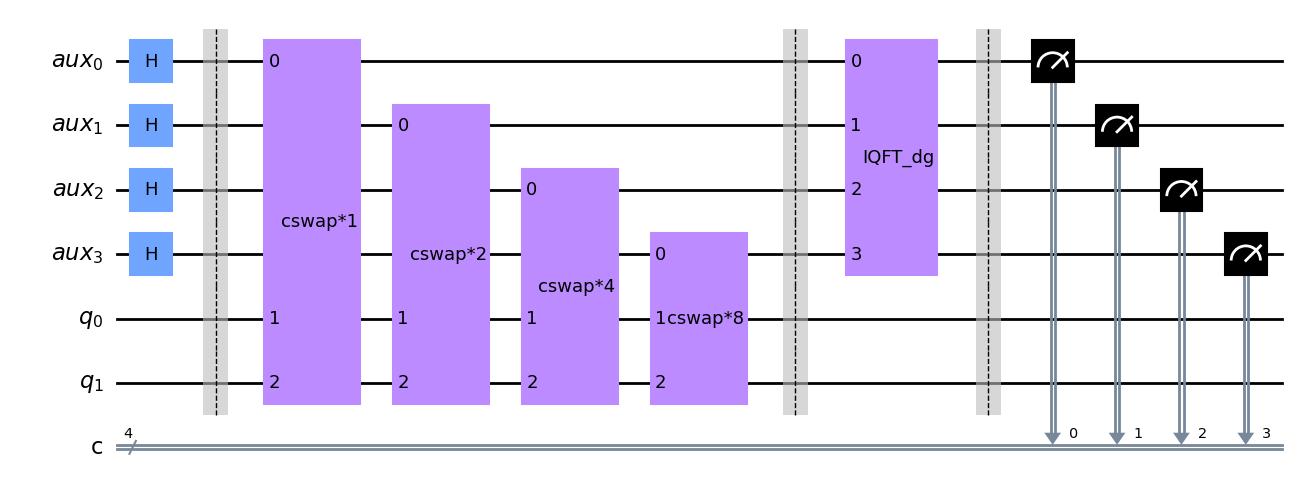

In [256]:
from qiskit.circuit.library import SwapGate

standard_QPE_circuit(SwapGate()).draw(output = 'mpl')

Now we test our circuit to estimate the phase of the $T$ gate corresponding to the $\vert 1\rangle$ eigenstate. The answer $\theta$ we expect can be found by equating

$$
2\pi\theta = \pi/4
$$
i.e. $\theta = 1/8$. This is indeed the answer we get below. Since $1/8$ is a binary fraction, our result has no error once there are at least 3 auxiliary qubits.

In [259]:
from qiskit.circuit.library import TGate

u = TGate()
mainreg_size = u.num_qubits

precision = 2**-4

# Set initial state to one
prep = QuantumCircuit(mainreg_size)
prep.x(0)
Uprep = prep.to_gate(label = r'$X$')

# Create circuit for standard QPE
SQPE = standard_QPE_circuit(u, Uprep, precision = precision)

# Execute circuit
job = Sampler().run(SQPE, shots = 1)
result_dict = job.result().quasi_dists[0].binary_probabilities()
measurement = list(job.result().quasi_dists[0].binary_probabilities())[0]

# Convert binary string to a float
phase = int(measurement,2)/2**len(measurement)

print("Estimate of phase:", phase)
print("To precision:", precision) 

Estimate of phase: 0.125
To precision: 0.0625


## Iterative Quantum Phase Estimation

Though one of many iterative phase estimation algorithms, this one is often considered "the" iterative QPEA, as it is obtained from standard QPE through a simple transformation. 

### Characteristics

Iterative: Yes \
Adaptive: Yes \
Coherent: Optional \
Qubit overhead: $O(1)$. \
Runtime: $O(1/\epsilon)$ calls to the controlled-$U$. \
Maximum depth: $O(1/\epsilon)$

### Circuit Diagram

### Description of procedure

### Equivalence to Standard QPE

The key idea is to look closer at the inverse Quantum Fourier Transform at the end of the standard QPE circuit. 

**Put diagram here of iQFT with measurements gates**. 

The controlled phase gates in this diagram are quantum controls, but they don't have to be. We can create an equivalent circuit by pushing the measurements in front of the phase gate, and swapping the quantum control for a classical one.

**Put two diagrams, equal to each other, showing switching measurement and controls**

This is the key to making standard QPE an iterative algorithm. By using the equivalence

**Put circuit equality in which two qubits with quantum control is reduced to one w/ classical control and reset operation**

we have turned two parallel operations into sequential operations. The upshot is that the number of unique qubits has been reduced by one. Having fewer qubits to accomplish the same task is valuable for near-term quantum computing.

Because the phase gates are applied depending on previous measurements, this is an *adaptive* procedure. It produces equivalent results to standard QPE, and therefore inherets many of the same properties. However, the algorithm can, optionally, be run *incoherently* by resetting the entire system after each measurement. Like other incoherent schemes, this will only work on near-perfect eigenstates.

### Qiskit Implementation

#### Relevant imports

In [ ]:
import numpy as np
from qiskit import ClassicalRegister, QuantumRegister, QuantumCircuit
from qiskit_aer.primitives import Sampler
from qiskit.circuit.library.standard_gates import SwapGate, TGate

#### Define the circuit

In [95]:
import numpy as np
from qiskit import QuantumRegister, ClassicalRegister, QuantumCircuit

def iterative_QPE_circuit(U, precision = 2**-4, coherent = True):
    """
    Args:
        U (Gate): Unitary gate in phase estimation problem
        precision (float): Desired precision of final phase estimate
        coherent (bool): If true, retains state of main register following each measurement. 
        Otherwise, all registers are reset to initial values following each measurement. 
    Returns:
        QuantumCircuit that implements Iterative QPE
    """
    cU = U.control(1)
    bits_precision = int(np.ceil(np.log2(1/precision)))
    
    # Construct registers and circuit
    cr = ClassicalRegister(bits_precision, r'$\varphi$')
    aux = QuantumRegister(1, 'aux')
    main = QuantumRegister(U.num_qubits, 'q')
    QPE_circ = QuantumCircuit(aux, main, cr)

    
    for bit in range(bits_precision -1, -1,-1):
        QPE_circ.h(0)
        QPE_circ.append(cU.repeat(2**bit), aux[:] + main[:])
        
        # Controlled phases loop
        for b in range(bit +1, bits_precision):
            k = (b - bit) + 1
            QPE_circ.p(-(2*np.pi)/2**k,0).c_if(b,1)
        
        QPE_circ.h(0)
        
        # Measure, store result, reset
        QPE_circ.measure(0, bit)
        QPE_circ.reset(0)
        
        # Reset all qubits if not coherent
        if not coherent: 
            QPE_circ.reset(main[:])
            QPE_circ.barrier()
            
    return QPE_circ

### Illustrate the circuit with SWAP

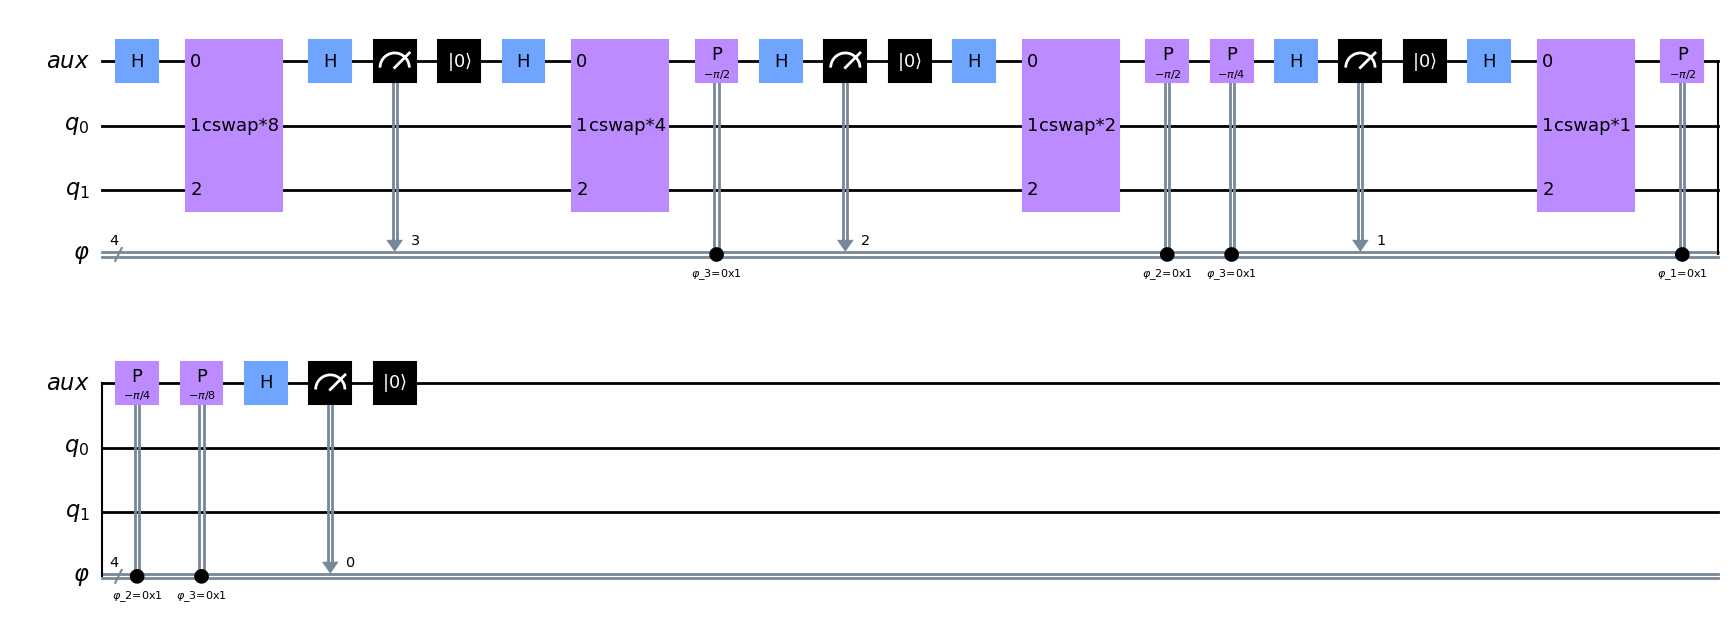

In [160]:
iterative_QPE_circuit(SwapGate()).draw(output = 'mpl')

Now we test our circuit to estimate the phase of the $T$ gate corresponding to the $\vert 1\rangle$ eigenstate. The answer $\theta$ we expect can be found by equating

$$
2\pi\theta = \pi/4
$$
i.e. $\theta = 1/8$. This is indeed the answer we get below, whether we do coherent or incoherent evolution (they are equivalent here since $\vert1\rangle$ is a perfect eigenstate). Since $\theta$ is a binary fraction, we should always get an exact answer with a sufficient number of auxiliary qubits.

In [163]:
precision = 10**-2

# Set initial state to one
prep = QuantumCircuit(1)
prep.x(0)

# Create circuit for IQPE
IQPE = iterative_QPE_circuit(TGate(), precision = precision, coherent = True)
IQPE.compose(prep, qubits = range(1,IQPE.num_qubits),front = True, inplace = True)

# Execute circuit
job = Sampler().run(IQPE, shots = 1)
result_dict = job.result().quasi_dists[0].binary_probabilities()
measurement = list(job.result().quasi_dists[0].binary_probabilities())[0]

# Our ordering convention here is opposite of qiskit. Reverse string.
measurement = measurement[::-1]

# Convert binary string to a float
phase = int(measurement,2)/2**len(measurement)

print("Estimate of phase:", phase)
print("To precision:", precision) 

Estimate of phase: 0.125
To precision: 0.01


## Hadamard Phase Estimation

Possibly the simplest QPEA, the simple Hadamard test serves as a phase estimation algorithm. 

### Characteristics

Iterative: Yes \
Adaptive: No \
Coherent: Optional \
Qubit overhead: $1$ additional qubit \
Runtime: $O(1/\epsilon^2)$ iterations. \
Maximum depth: $O(1)$ for incoherent, full runtime for coherent \

### Circuit diagram

**Can be taken from Hadamard test almost without change**

### Description of procedure

Can be run coherently or incoherently. Incoherent is just Hadamard test (see that article). Only works for approximate eigenstates.

Now consider coherent version, which is just repeating the Hadamard test circuit over and over without resetting main register.

**Show math here. Trials are independent. **

### Details and commentary
A drawback to the simplicity is the quadratically worse scaling in $\epsilon$ compared to other approaches. But there is only one auxiliary qubit. 

### Qiskit Implementation

#### Relevant imports

In [4]:
import numpy as np
from qiskit import ClassicalRegister, QuantumRegister, QuantumCircuit
from qiskit_aer.primitives import Sampler
from qiskit.circuit.library.standard_gates import SwapGate, TGate

#### Basic Hadamard circuit

The code below is borrowed from the Hadamard test compendium article. See that page for further details.

In [5]:
def hadamard_test(U, add_s_gate=False, measure=True):
    """
    Args:
        U (Gate): Unitary gate in phase estimation problem
        add_s_gate (bool): Whether to at S gate to auxiliary register following controlled unitaries. 
            Equivalently, whether to perform C(U) (False) or C(i U) (True). 
        measure (bool): Whether to measure the auxiliary qubit (True) or not (False).
    Returns:
        QuantumCircuit that implements the Hadamard test
    """
    # Initialize registers and circuit
    aux = QuantumRegister(1, 'aux')
    main = QuantumRegister(U.num_qubits, 'q')
    circuit = QuantumCircuit(aux, main)
    
    # Construct controlled-U gate
    cU = U.control(1)
    
    # Add gates to circuit
    circuit.h(aux)
    circuit.append(cU, aux[:] + main[:])
    if add_s_gate:
        circuit.s(aux)
    circuit.h(aux)
    
    # Add measurement if option specified
    if measure:
        creg = ClassicalRegister(1, 'c')
        circuit.add_register(creg)
        circuit.measure(aux, creg)
    
    return circuit

In [6]:
from qiskit.circuit.library.standard_gates import ZGate
hadamard_circuit(ZGate(), add_s_gate =True, measure = True).draw(output='mpl')

NameError: name 'j' is not defined

#### Coherent vs incoherent phase estimation

Hadamard phase estimation involves repeated Hadamard circuit measurements. There are two approaches we can take:

- Perform a Hadamard test on many copies of identical input states. We label this "incoherent" phase estimation. This approach only works when the state is approximately an eigenstate, but uses shallower circuits. 
- After each Hadamard test measurement, leave the state of the main register as is. This corresponds to "coherent" phase estimation. This approach allows for phase estimation with generic input states, with probability of a phase being measured given by the Born rule. However, this approach has larger circuit depths.

The following function creates the required circuit for coherent phase estimation.

In [10]:
# State of main register is not reset after each measurement. Allows for phase estimation over superpositions.
def coherent_Hadamard_circuit(U, Ncycles):
    """
    Args:
        U (Gate): Unitary gate to measure
        Ncycles: Number of measurements (iterations) on auxiliary qubit for phased and unphased Hadamard test. 
    Returns:
        QuantumCircuit that implements a coherent version of the Hadamard test, where the state of the main register is not reset following measurements.
    """
    hadamard_circ = hadamard_circuit(U, add_s_gate = False, measure = True)
    
    
    # Initialize circuit with first iteration as initial fencepost
    circuit = hadamard_circuit(U, add_s_gate = False, measure = False)
    creg = ClassicalRegister(2*Ncycles, 'c')
    circuit.add_register(creg)
    circuit.measure(0, creg[0])
    circuit.reset(0)
    
    # Perform nonphased measurements
    for k in range(1, Ncycles):
        circuit = circuit.compose(hadamard_circ, qubits = None, clbits = k)
        circuit.reset(0)
        
    hadamard_circ = hadamard_circuit(U, add_s_gate = True, measure = True)
    
    # Perform phased measurements
    for k in range(0, Ncycles):
        circuit = circuit.compose(hadamard_circ, qubits = None, clbits = k + Ncycles)
        circuit.reset(0)
    
    return circuit

We demonstrate this construction for $U = \text{SWAP}$.

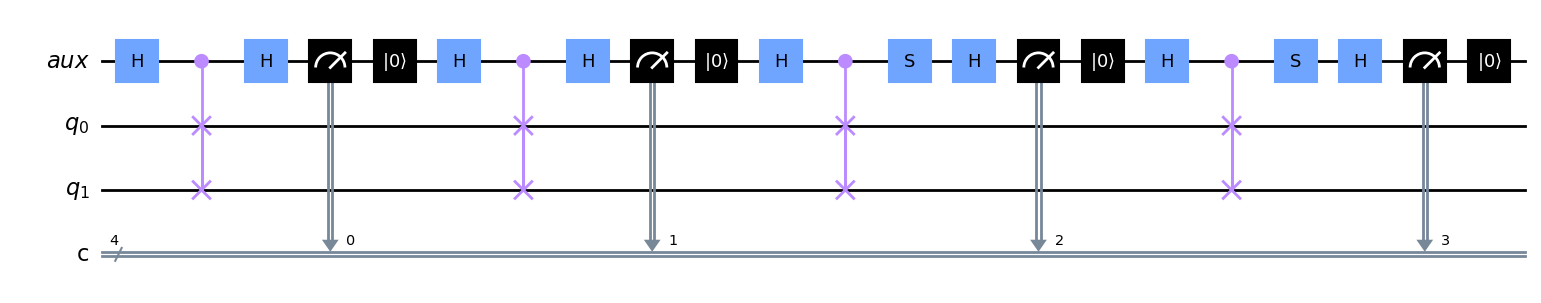

In [12]:
circuit = coherent_Hadamard_circuit(SwapGate(), 2)
circuit.draw(output = 'mpl')

Using `Ncycles = 2` is typically too short to get a good estimate, but we wanted to make the circuit easy to visualize. 

#### Hadamard phase estimation.

Below is a function to perform Hadamard phase estimation, either coherent or incoherent. 

In [11]:
def Hadamard_phase_estimation(U, Uprep = None, precision = 2 * 10**-1, coherent = False, confidence_factor = 2):
    """
    Args:
        U (Gate): Unitary gate in phase estimation problem
        Uprep (Instruction): State preparation on main register starting from all |0> state (If None, no state prep added). 
        precision (float): Desired precision of phase estimate. 
        coherent (bool): Whether to keep state of principal register (True) 
            or reset to original state (False) after each measurement.
        confidence_factor (float): A parameter which scales the number of iterations proportionally. Should be set on the order of 1.
            Larger values increase confidence of answer being within set precision.
    Returns:
        An estimate for the phase of some eigenstate, sampled according to the initial state, with specified precision, and confidence related to confidence_factor.
    """

    Ncycles = int(confidence_factor//(precision**2))
    
    # Do single shot, coherent phase estimation if coherent = True
    if coherent:
        phase_estimation_circuit = coherent_Hadamard_circuit(U, Ncycles)
        # Perform state prep, if any
        if Uprep != None: phase_estimation_circuit.compose(Uprep, qubits = range(1,U.num_qubits + 1), front = True, inplace = True)
        # Run circuit
        job = Sampler().run(phase_estimation_circuit, shots = 1)
        result_dict = job.result().quasi_dists[0].binary_probabilities()
        measurements = list(job.result().quasi_dists[0].binary_probabilities())[0]
        
        # Split results into phased and unphased measurements
        phased_measurements = measurements[0:Ncycles]
        unphased_measurements = measurements[Ncycles:2*Ncycles]

        
        # Compute Hamming weight to get counts
        phased_counts = np.sum(list(map(int,phased_measurements)))
        unphased_counts = np.sum(list(map(int,unphased_measurements)))
        
        # Extract Pr(0)
        unphased_p0 = 1 - unphased_counts/Ncycles
        phased_p0 = 1 - phased_counts/Ncycles
    else:  
        # Otherwise, do incoherent phase estimation
        unphased_circuit = hadamard_circuit(U, add_s_gate = False, measure = True)
        phased_circuit = hadamard_circuit(U, add_s_gate = True, measure = True)
        # Do state prep, if any
        if Uprep != None:
            unphased_circuit = unphased_circuit.compose(Uprep, range(1,unphased_circuit.num_qubits),front = True)
            phased_circuit = phased_circuit.compose(Uprep, range(1,unphased_circuit.num_qubits), front = True)

        # Run circuits
        unphased_results = Sampler().run(unphased_circuit, shots = Ncycles).result().quasi_dists[0]
        phased_results = Sampler().run(phased_circuit, shots = Ncycles).result().quasi_dists[0]

        # Extract Pr(0)
        unphased_p0 = unphased_results.get(0, 0)
        phased_p0 = phased_results.get(0, 0)

    
    # Get cosine and sine of phase
    costheta = 2*unphased_p0 - 1
    sintheta = 1- 2*phased_p0
    
    #Extract phase as final result
    theta = np.arctan2(sintheta, costheta)
    # Make branch correction to [0, 2 pi)
    if theta < 0: theta += 2*np.pi
    # Return number between 0,1
    theta = theta/(2*np.pi)
    return theta

As an example, we do a coherent Hadamard phase estimation using the SWAP gate. our initial state $\vert01\rangle$ is an equal superposition of a symmetric (+1) and antisymmetric (-1) eigenstate of SWAP. Therefore, we will measure phases of $0$ or $.5$, each with 50% probability.

In [106]:
# Prepare a superposition of symmetric.
prep_circuit = QuantumCircuit(2)
prep_circuit.x([0,1])
prep_circuit.h(0)
prep_circuit.cx(0,1)

Uprep = prep_circuit.to_gate()

## Kitaev Phase Estimation Algorithm

The Kitaev phase estimation algorithm (KPEA) is simply Hadamard phase estimation, but repeated several times with certain powers of $U$ and followed by classical post processing on the resulting data. Thus, the "quantum" part of the algorithm is essentially unchanged. For this reason, sometimes the previously described "Hadamard Phase Estimation" is termed Kitaev Phase Estimation. Here we use "Kitaev" to refer to the procedure described here, which includes some nontrivial classical post processing. 

### Characteristics

Iterative:Yes \
Adaptive: No \
Coherent: Optional \
Qubit overhead: $1$ auxiliary qubit \
Runtime: $O(\epsilon^{-1} \log\log(1/\epsilon))$ \
Maximum depth: $O(\epsilon^{-1})$

### Diagram

**Basically the same as Hadamard, could show multiple in parallel and then a laptop gif receiving the information.**

### Description of procedure

The basic idea of the Kitaev approach is as follows. We estimate $\theta_j = 2^j \theta$ for $j = 0,1, \dots, m$, to precision at least $1/16$ using Hadamard phase estimation. The choice of $1/16$ is for technical reasons, but the point is that this accuracy is a constant, independent of our final desired precision in the estimate. Note that we can obtain $\theta_j$ by running the Hadamard phase estimation procedure on unitary $U_j = U^{2_j}$.  

Using the set of $\theta_j$, we can "stitch" them together to achieve an accurate estimate of $\theta$. **How? Write the classical procedure here.**

### Details and commentary

Remarkably, KPEA achieves higher accuracies than Hadamard phase estimation while still using only a single auxiliary qubit. This low spatial overhead makes KPEA a noteworthy alternative to standard phase estimation, especially when the number of available qubits is small. Moreover, the classical post processing is simple and efficient to perform. 

### Pseudocode

### Qiskit Implementation

#### Imports

In [ ]:
import numpy as np
from qiskit import ClassicalRegister, QuantumRegister, QuantumCircuit
from qiskit_aer.primitives import Sampler
from qiskit.circuit.library.standard_gates import SwapGate, TGate

First define a function `distance_mod1` for later convenience. This essentially computes the distance between two points on a circle of circumference $1$. 

In [2]:
def distance_mod1(x,y):
    """
    Args:
        x (float), y (float): Values in [0,1). If outside range, values are taken mod 1.

    Returns:
        The distance between x and y mod 1. That is, the distance between x and y on a circle with circumference 1.
    """
    # Put x and y within proper bounds
    x %= 1
    y %= 1
    return np.min([np.abs(x-y), 1-np.abs(x-y)])

Next, we define the protocol. 

In [8]:
def Kitaev_phase_estimation(U, Uprep = None, precision = 10**-2, coherent = False, confidence_factor = 2):
    """
    Args:
        U (Gate): Unitary gate in phase estimation problem
        Uprep (Instruction): State preparation on main register starting from all |0> state (If None, no state prep added). 
        precision (float): Desired precision of phase estimate. 
        coherent (bool): Whether to keep state of principal register (True) 
            or reset to original state (False) after each measurement.
        confidence_factor (float): A parameter which scales the number of iterations proportionally. Should be set on the order of 1.
            Larger values increase confidence of answer being within set precision.          
    Returns:
        An estimate for the phase of some eigenstate, sampled according to the initial state, 
        with specified precision and confidence related to confidence_factor.
    """
    # Parameters of precision
    nbits = int(np.ceil(np.log2(1/precision)))
    nreps = nbits - 2
    
    # Perform Hadamard phase estimation on U**(2**j) to fixed precision
    phases = np.zeros(nreps)
    for j in range(nreps):
        phases[j] = Hadamard_phase_estimation(U.repeat(2**j), Uprep, precision = 1/16, coherent = False)
    
    # Classical part to amplify precision
    beta = [0]*nreps
    for j in range(nreps):
        # Round to nearest octant in [0,1)
        beta[j] = (int(np.round(8*phases[j]))%8)/8
    #Retrieve last 3 bits in binary form
    last_bits = bin(int(beta[j]*8))[2:]
    last_bits = beta[nreps - 1]= '0'*(3-len(last_bits)) + last_bits # pad with zeros to get bbb format 
    # Do alpha recursion for remaining bits
    alpha = [0]*nbits
    alpha[nreps + 1]= int(beta[nreps-1][2])
    alpha[nreps] = int(beta[nreps-1][1])
    alpha[nreps-1] = int(beta[nreps-1][0])
    for j in range(nreps-2,-1,-1):
        # fill in the values of alpha
        alpha[j] = int(distance_mod1(beta[j], .5 + alpha[j+1]/4 + alpha[j+2]/8) <.25)
    
    print(alpha)
    return np.sum(alpha * (2.0**(-np.arange(1, nbits+1))))

IndentationError: expected an indented block after function definition on line 1 (1299480374.py, line 2)

In [9]:
# Prepare a superposition of symmetric.
prep_circuit = QuantumCircuit(2)
prep_circuit.x([0,1])
prep_circuit.h(0)
prep_circuit.cx(0,1)

Uprep = prep_circuit.to_gate()
print(Kitaev_phase_estimation(SwapGate(), Uprep = prep_circuit))

NameError: name 'QuantumCircuit' is not defined

## Fast Phase Estimation

Fast Phase Estimation is an improvement upon Kitaev Phase Estimation.

### Characteristics

Iterative:Yes \
Adaptive: No \
Coherent: 
Qubit overhead: 
Runtime: 
Maximum depth: 

### Diagram

### Description of procedure

### Commentary

### Qiskit implementation

#### Imports

In [ ]:
import numpy as np
from qiskit import ClassicalRegister, QuantumRegister, QuantumCircuit
from qiskit_aer.primitives import Sampler
from qiskit.circuit.library.standard_gates import SwapGate, TGate

## Rejection Filtering Phase Estimation

### Characteristics

Iterative:Yes \
Adaptive: Yes \
Coherent: Yes \
Qubit overhead: 
Runtime: 
Maximum depth: 

### Diagram

### Description of procedure

### Commentary

### Qiskit implementation

#### Imports

In [ ]:
import numpy as np
from qiskit import ClassicalRegister, QuantumRegister, QuantumCircuit
from qiskit_aer.primitives import Sampler
from qiskit.circuit.library.standard_gates import SwapGate, TGate

## Applications

### Cryptography

Phase estimation is a subroutine of Shor's algorithm for the discrete logarithm. This can be used to break both RSA (through prime factorization) and elliptic curve cryptographic schemes. For example, Shor's order finding algorithm (a special case) performs phase estimation with a unitary $U$ acting on the computational basis as 

$$
U\vert y\rangle = \vert xy\; (\mathrm{mod} N)\rangle
$$
where $N > 0$ and $x < N$ are integers relevant to the problem. The input state is $\vert1\rangle$, which is a uniform superposition of the eigenstates of $U$. Thus, any coherent phase estimation procedure can determine one of the phases of $U$. These phases contain information about the order of $x$ with respect to $N$. 

### Eigenvalues of Hermitian operators

For any Hermitian operation $H$, the collection of unitary matrices $U(t) = e^{i H t}$ is unitary for any $t \in \mathbb{R}$. Thus, performing phase estimation on $U(t)$ gives an eigenvalue of $H t$ modulo $2\pi$. By choosing $t$ such that $\vert E t\vert < \pi/2$ for the eigenvalue(s) $E$ of interest, the eigenvalue can be determined unambiguously. 

### Physics and chemistry

A special case of the preceding application, which deserves special attention. In any quantum mechanical system, an important Hermitian operator is the Hamiltonian $H$, whose eigenvalues may be interpreted as the allowed energies of the system. Moreover, the unitary $U(t) = e^{-i H t}$ is the operator which evolves the system in time. By performing phase estimation with $U(t)$ for suitable choices of $t$, and for a given initial state, the system energies may be estimated. 

### Solving Linear Systems

In the Harrow Hassidim Lloyd (HHL) algorithm for solving the linear systems $A x = b$ uses phase estimation as a subroutine. In particular, the relevant Hermitian operator is (in block diagonal form)

$$
C = \begin{pmatrix} 
0 & A \\
A^\dagger & 0
\end{pmatrix}.
$$

## References and Resources

### General
- [Fundamentals of Quantum Algorithms, Phase Estimation and Factoring](https://learning.quantum-computing.ibm.com/course/fundamentals-of-quantum-algorithms/phase-estimation-and-factoring). A pedagogical introduction to phase estimation.
- Nielsen and Chuang, [Quantum Computation and Quantum Information](https://www.cambridge.org/highereducation/books/quantum-computation-and-quantum-information/01E10196D0A682A6AEFFEA52D53BE9AE#overview) Chapter 5. A standard reference as well. Focuses on standard phase estimation
- Svore, Hastings, Freedman, "[Faster Phase Estimation](https://arxiv.org/abs/1304.0741)." Research article containing a pedagogical review of many iterative algorithms. 

### Standard Phase Estimation
- First two resources above.
- 1 Minute Qiskit, ["How can I estimate Pi using a quantum computer?"](https://www.youtube.com/watch?v=PBXb2LyFg3o)


### Iterative Phase Estimation (Standard)
- Ferris, [2023 Qiskit Global Summer School](https://www.youtube.com/watch?v=aLSM0_H8hUE)
- IBM Learning Platform, [Iterative Phase Estimation](https://learning.quantum-computing.ibm.com/tutorial/iterative-phase-estimation)

### Hadamard Phase Estimation
- Kitaev, Shen, Vyalvi, ["Classical and Quantum Computation"](https://bookstore.ams.org/gsm-47#:~:text=This%20book%20is%20an%20introduction,of%20complexity%20of%20an%20algorithm.) pages 126-127
- Svore, Hastings, Freedman, ["Faster Phase Estimation"](https://arxiv.org/abs/1304.0741)
- Nielsen and Chuang, pg 243-244, Problem 5.3 (Note that they call this "Kitaev's algorithm", contrary to our convention)

### Kitaev Phase Estimation
- Svore, Hastings, Freedman, ["Faster Phase Estimation"](https://arxiv.org/abs/1304.0741)
- Kitaev, Shen, Vyalvi, ["Classical and Quantum Computation"](https://bookstore.ams.org/gsm-47#:~:text=This%20book%20is%20an%20introduction,of%20complexity%20of%20an%20algorithm.) pages 128-129

### Fast Phase Estimation
- Svore, Hastings, Freedman, ["Faster Phase Estimation"](https://arxiv.org/abs/1304.0741)

### Rejection Filtering Phase Estimation
- Wiebe, Granade, ["Efficient Bayesian Phase Estimation" (2016)](https://journals.aps.org/prl/abstract/10.1103/PhysRevLett.117.010503)